In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
#sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
sys.path.append ('/Projects/PyPharmer_devel/') #path for angel in Groningen
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import PyPharmer as phr
from PyPharmer import clique_analyzer as c_analyzer
import simplejson as json
import os 
from pprint import pprint

## Load files

In [3]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json'

## Saving points values using PyPharmer

In [22]:
data=phr.Descriptors (benchmark,select='enabled')

In [23]:
data.points

array([['Aromatic', 11.96, 61.004, 12.143, 1.1, 0, 0, 0],
       ['HydrogenDonor', 14.95, 55.73, 12.124, 0.5, 0, 0, 0],
       ['HydrogenDonor', 16.706, 51.802, 14.687, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 10.974, 60.526, 11.274, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 14.956, 52.572, 15.968, 0.5, 0, 0, 0],
       ['Hydrophobic', 11.96, 61.004, 12.143, 1, 0, 0, 0],
       ['Hydrophobic', 16.885, 53.668, 12.474, 1, 0, 0, 0],
       ['Hydrophobic', 17.235, 55.494, 10.11, 1, 0, 0, 0]], dtype=object)

In [24]:
G= nx.Graph (pharmacophore='descriptors')
combinations=list(it.combinations(data.points,2))
for point in combinations:
    point_1=((point[0][1],point[0][2],point[0][3]))
    point_2=((point[1][1],point[1][2],point[1][3]))
    array_1=np.array (point_1)
    array_2=np.array (point_2)
    dist = np.linalg.norm (array_1-array_2)
    rmsd=((0.5)*(dist**2))**(1/2)
    if point [0][0]==point[1][0] and dist <= 1.: ### All descriptors with same position but diferent property
        #print (point [0][0], 'vs', point[1][0],'distance',dist,'rmsd', rmsd) 
        G.add_node (node_for_adding=point_1, name=point[0][0])
        G.add_node (node_for_adding=point_2, name=point[0][0])
        G.add_edge (point_1,point_2)

In [25]:
G.number_of_nodes()

0

In [26]:
G.number_of_edges ()

0

<IPython.core.display.Javascript object>


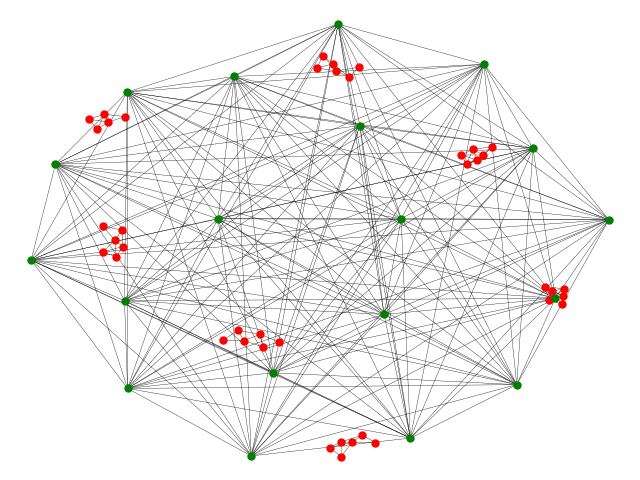

In [27]:
options = {'node_size': 25,
           'width': 0.25,
          }
nx.draw_spectral (G,**options)

In [10]:
load=phr.Pharmacophore (benchmark, with_receptor=True, with_ligand=True, select='enabled') 
load.get_view()

NGLWidget()

# All together

In [28]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json']


In [29]:
G= nx.Graph (pharmacophore='descriptors')
points=[]
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    for point in data.points:
        points.append (point)
        combinations=list(it.combinations(points,2))
        for point in combinations:
            point_1=((point[0][1],point[0][2],point[0][3]))
            point_2=((point[1][1],point[1][2],point[1][3]))
            array_1=np.array (point_1)
            array_2=np.array (point_2)
            dist = np.linalg.norm (array_1-array_2)
            rmsd=((0.5)*(dist**2))**(1/2)
            if point [0][0]==point[1][0] and dist <= 1.: ### All descriptors with same position but diferent property
                ''' 
                isntead or adding point by point, I need to add a concensus point,
                I will calculate a average position and radious'''
                
                G.add_node (node_for_adding=point_1, name=point[0][0])
                G.add_node (node_for_adding=point_2, name=point[0][0])
                G.add_edge (point_1,point_2)
                #result=list(it.combinations(G.nodes,2) #implemented to conect the 'small cliques' with the others, but it conects everything and is useless now
                #for j in list(result):
                    #G.add_edge (j[0],j[1])
print ('number of nodes:', G.number_of_nodes())
print ('number of edges:', G.number_of_edges ())
nx.draw (G,node_size=25, width=0.25)

number of nodes: 41
number of edges: 74


In [30]:
max_=nx.make_max_clique_graph (G)

In [31]:
result=list(it.combinations(max_.nodes,2))
for j in list(result):
    max_.add_edge (j[0],j[1])
print ('number of nodes:', max_.number_of_nodes())
print ('number of edges:', max_.number_of_edges ())
nx.draw (max_,node_size=25,width=0.25,node_color='green')

number of nodes: 19
number of edges: 171


In [32]:
max_.nodes.data()

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}})

In [33]:
for file in ligands:
    load=phr.Pharmacophore (file, with_receptor=True, with_ligand=True, select='enabled') 
load.get_view()

NGLWidget()